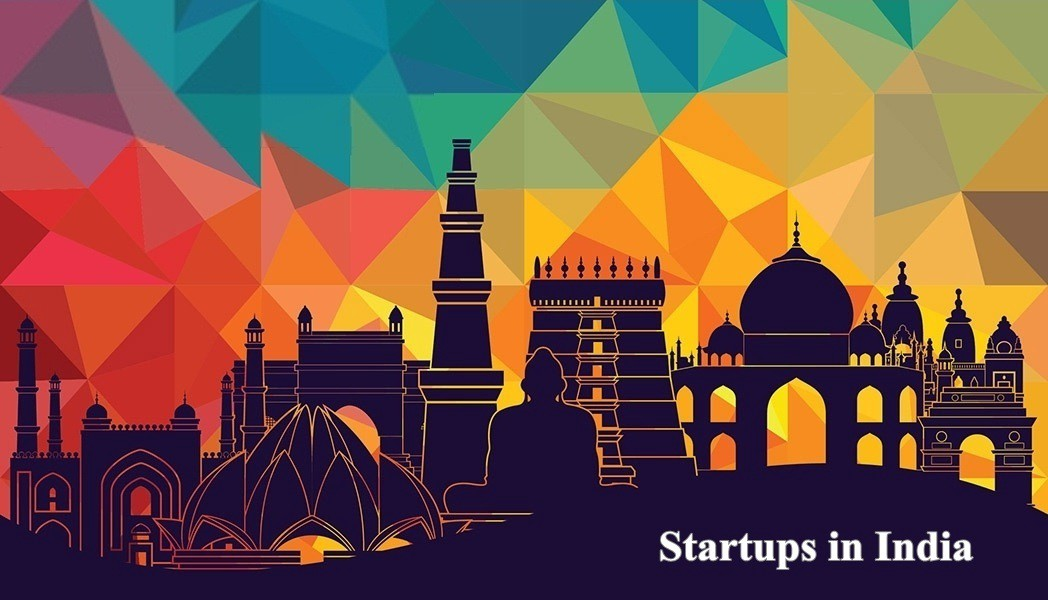

In [1]:
from PIL import Image 
Image.open("indian startup.png")

In [2]:
#for data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re
#for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# Importing DataFrame

In [3]:
# Opening the downloaded csv file.
dataframe=pd.read_csv('startup_funding_2015_19.csv')
dataframe

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,3031,19/01/2015,Hostel Dunia,E-Commerce (Service),NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000,NaN
1,3032,19/01/2015,Play your sport,Entertainment and Social Network,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000,NaN
2,3033,19/01/2015,Yo Grad,EdTech,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000,NaN
3,3034,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000,NaN
4,3035,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000,NaN
5,2946,02/02/2015,Faaya,E-Commerce (Goods),NaN,NaN,Group of Angel Investors,Seed Funding,16600,At the 10 minute million event
6,2947,02/02/2015,InstaBounce,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600,At the 10 minute million event
7,2948,02/02/2015,Chloroplast Foods,E-Commerce (Goods),NaN,NaN,Group of Angel Investors,Seed Funding,16600,At the 10 minute million event
8,2949,02/02/2015,Dealwithus,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600,At the 10 minute million event
9,2950,02/02/2015,CleverSharks,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600,At the 10 minute million event


# Understanding the data

In [4]:
# Lets start with renaming the column titles for convenieance.
dataframe.columns = ['Sr No','Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'Investment Type',
       'Amount in USD','Remarks']

In [5]:
# Checking how many rows and columns are present in the dataframe.
print("The dataframe has {} rows and {} columns".format(dataframe.shape[0],dataframe.shape[1]))

The dataframe has 3009 rows and 10 columns


In [6]:
# Reading the dataframe information.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 10 columns):
Sr No                3009 non-null int64
Date                 3009 non-null object
Startup Name         3009 non-null object
Industry Vertical    2970 non-null object
SubVertical          2073 non-null object
City  Location       2829 non-null object
Investors Name       2986 non-null object
Investment Type      3006 non-null object
Amount in USD        2045 non-null object
Remarks              419 non-null object
dtypes: int64(1), object(9)
memory usage: 235.2+ KB


# Data Cleansing

Finding null value in each column.

In [7]:
# Display how many null values are there in each column.
dataframe.apply(lambda x : sum(x.isnull()))

Sr No                   0
Date                    0
Startup Name            0
Industry Vertical      39
SubVertical           936
City  Location        180
Investors Name         23
Investment Type         3
Amount in USD         964
Remarks              2590
dtype: int64

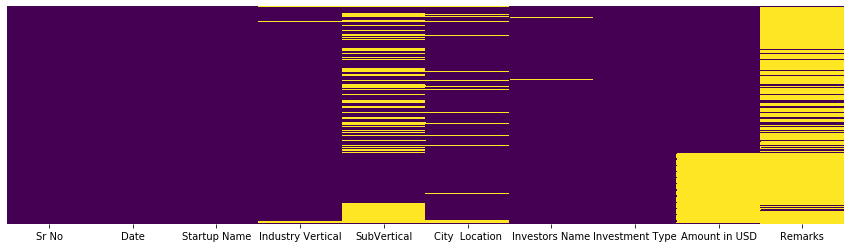

In [8]:
# Display a heatmap showing how many null values are there in each column.
plt.figure(figsize=(15,4))
sns.heatmap(dataframe.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

Removal of unnecessary column.

In [9]:
# The date listed under Sr No and Remarks are not needed, so we are removing it.
df = dataframe.drop(columns = 'Sr No')
data = df.drop(columns = 'Remarks')
data

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,19/01/2015,Hostel Dunia,E-Commerce (Service),NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000
1,19/01/2015,Play your sport,Entertainment and Social Network,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000
2,19/01/2015,Yo Grad,EdTech,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000
3,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000
4,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000
5,02/02/2015,Faaya,E-Commerce (Goods),NaN,NaN,Group of Angel Investors,Seed Funding,16600
6,02/02/2015,InstaBounce,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600
7,02/02/2015,Chloroplast Foods,E-Commerce (Goods),NaN,NaN,Group of Angel Investors,Seed Funding,16600
8,02/02/2015,Dealwithus,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600
9,02/02/2015,CleverSharks,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,16600


Cleanising the data under 'Amount in USD'.

In [10]:
# Drop the rows where amount is zero.
data = data.drop(data[data['Amount in USD'].isnull()].index )

# Drop the rows where amount is Undisclosed.
data = data.drop(data[(data['Amount in USD'] == 'Undisclosed') | (data['Amount in USD'] == 'undisclosed')].index )

# Drop the rows where amount is N/A.
data = data.drop(data[(data['Amount in USD'] == 'N/A') | (data['Amount in USD'] == 'N/A')].index )

# Convert the data into float
data['Amount in USD'] = data['Amount in USD'].astype('float')


Cleanising the data under 'City Location'.

In [11]:
# Check for null values
print("Null values are: " , len(data[data['City  Location'].isnull()]))

Null values are:  135


In [12]:
# Replace the Null values and entries with nan and N/A with 'Not Specified'.
data['City  Location'] = data['City  Location'].fillna('Not Specified')
data.loc[(data['City  Location'] == 'nan') | (data['City  Location'] == 'N/A') , 'City  Location'] = 'Not Specified'

# We have to clean the data to avoid duplicity. 
data.loc[(data['City  Location'] == 'Ahemadabad') | (data['City  Location'] == 'Ahemdabad') , 'City  Location'] = 'Ahmedabad'
data.loc[(data['City  Location'] == 'Bangalore') | (data['City  Location'] == 'Bengaluru') , 'City  Location'] = 'Bengaluru'
data.loc[(data['City  Location'] == 'Bhubaneswar') | (data['City  Location'] == 'Bhubneswar') , 'City  Location'] = 'Bhubaneswar'
data.loc[(data['City  Location'] == 'Gurgaon') | (data['City  Location'] == 'Gurugram') , 'City  Location'] = 'Gurugram'
data.loc[(data['City  Location'] == 'Kolkata') | (data['City  Location'] == 'Kolkatta') , 'City  Location'] = 'Kolkata'
data.loc[(data['City  Location'] == 'Nw Delhi') | (data['City  Location'] == 'Delhi') , 'City  Location'] = 'New Delhi'

# We will redefine the location of few startups that are located outside India as 'Abroad'.
data.loc[(data['City  Location'] == 'Bangalore / Palo Alto') | (data['City  Location'] == 'Bangalore / San Mateo') 
         | (data['City  Location'] == 'Bangalore / SFO') | (data['City  Location'] == 'Bangalore / USA') 
         | (data['City  Location'] == 'Bangalore/ Bangkok') | (data['City  Location'] == 'Boston') 
         | (data['City  Location'] == 'Burnsville') | (data['City  Location'] == 'California') 
         | (data['City  Location'] == 'Chennai/ Singapore') | (data['City  Location'] == 'Dallas / Hyderabad') 
         | (data['City  Location'] == 'Delhi & Cambridge') | (data['City  Location'] == 'Gurgaon / SFO') 
         | (data['City  Location'] == 'Hyderabad/USA') | (data['City  Location'] == 'India / US') 
         | (data['City  Location'] == 'India/Singapore') | (data['City  Location'] == 'India/US') 
         | (data['City  Location'] == 'London') | (data['City  Location'] == 'Menlo Park') 
         | (data['City  Location'] == 'Missourie') | (data['City  Location'] == 'Mumbai / Global') 
         | (data['City  Location'] == 'Mumbai /NY') | (data['City  Location'] == 'Mumbai / UK') 
         | (data['City  Location'] == 'Nairobi') | (data['City  Location'] == 'New Delhi / California') 
         | (data['City  Location'] == 'New Delhi / US') | (data['City  Location'] == 'New Delhi/ Houston') 
         | (data['City  Location'] == 'New York') | (data['City  Location'] == 'New York, Bengaluru') 
         | (data['City  Location'] == 'New York/ India') | (data['City  Location'] == 'Noida / Singapore') 
         | (data['City  Location'] == 'Palo Alto') | (data['City  Location'] == 'Pune / Dubai') 
         | (data['City  Location'] == 'Pune / Singapore') | (data['City  Location'] == 'Pune / US') 
         | (data['City  Location'] == 'Pune/Seattle') | (data['City  Location'] == 'San Francisco') 
         | (data['City  Location'] == 'Santa Monica') | (data['City  Location'] == 'Seattle / Bangalore') 
         | (data['City  Location'] == 'SFO / Bangalore') | (data['City  Location'] == 'Singapore') 
         | (data['City  Location'] == 'US') | (data['City  Location'] == 'US/India') | (data['City  Location'] == 'USA') 
         | (data['City  Location'] == 'USA/India') , 'City  Location'] = 'Abroad'
# The data has multiple cities seperated by /. So we remove the slash and pick one city. 
data['City  Location'].value_counts()

# We remove the slash and remove any excess space.
data['City  Location'] = data['City  Location'].apply(lambda x: x.split('/')[0].strip())

# We will redefine the location of few startups that mentioned State name as location to its City.
data.loc[(data['City  Location'] == 'Uttar Pradesh') , 'City  Location'] = 'Noida'
data.loc[(data['City  Location'] == 'Karnataka') , 'City  Location'] = 'Bengaluru'
data.loc[(data['City  Location'] == 'Kerala') , 'City  Location'] = 'Kochi'
data.loc[(data['City  Location'] == 'Haryana') , 'City  Location'] = 'Gurugram'
data.loc[(data['City  Location'] == 'India') , 'City  Location'] = 'New Delhi'

# Display the cleaned data.
data['City  Location']

0       Not Specified
1       Not Specified
2       Not Specified
3       Not Specified
4       Not Specified
5       Not Specified
6       Not Specified
7       Not Specified
8       Not Specified
9       Not Specified
10      Not Specified
11          Bengaluru
12             Kanpur
13          New Delhi
14          Bengaluru
15      Not Specified
16           Gurugram
17             Mumbai
18          New Delhi
19              Kochi
20          New Delhi
21      Not Specified
22          New Delhi
23          Bengaluru
24          New Delhi
25      Not Specified
26          New Delhi
27             Mumbai
28           Gurugram
29             Mumbai
            ...      
2010           Mumbai
2011           Mumbai
2012        New Delhi
2013         Gurugram
2014         Gurugram
2015         Gurugram
2016           Mumbai
2017        Bengaluru
2018        New Delhi
2019        Bengaluru
2020        Bengaluru
2021           Abroad
2022         Gurugram
2023         Gurugram
2024      

In [13]:
# Checking the location count.
data['City  Location'].value_counts()

Bengaluru                 576
Mumbai                    402
New Delhi                 267
Gurugram                  236
Not Specified             135
Chennai                    74
Hyderabad                  72
Pune                       69
Noida                      54
Abroad                     47
Ahmedabad                  29
Jaipur                     14
Kolkata                    10
Goa                         8
Vadodara                    6
Chandigarh                  6
Indore                      5
Coimbatore                  4
Bhopal                      3
Gwalior                     2
Kanpur                      2
Belgaum                     1
Andheri                     1
Udupi                       1
Kormangala                  1
Bengaluru and Gurugram      1
Varanasi                    1
Udaipur                     1
Gaya                        1
Rourkela                    1
Faridabad                   1
Bhubaneswar                 1
Jodhpur                     1
Kochi     

Cleanising the data under 'Industry Vertical' and 'SubVertical'.

In [14]:
# Fill the missing values with Not Specified.
data['Industry Vertical'] = data['Industry Vertical'].fillna('Not Specified')
data['SubVertical'] = data['SubVertical'].fillna('Not Specified')

# Drop the rows where amount is Undisclosed.
data = data.drop(data[(data['Industry Vertical'] == 'Not Specified') | (data['Industry Vertical'] == 'Not Specified')].index )

# Checking the Industry Vertical count.
data['Industry Vertical'].value_counts()

E-Commerce (Service)                489
E-Commerce (Goods)                  427
Information Technology              251
FinTech                             243
HealthTech                          182
EdTech                              122
Logistics Tech                       80
Entertainment and Social Network     70
Rental                               49
InsurTech                            21
Real Estate                          19
E-Commerce (Used)                    16
AgriTech                             16
Energy                               16
Manufacturing                        12
Name: Industry Vertical, dtype: int64

Cleanising the data under 'Investment Type'

In [15]:
print(data['Investment Type'].value_counts(dropna = False))

# Function to remove the slash
def remove_Slash(investment):
    temp = investment
    if re.search('/', investment):
        temp = investment.split('/')[1].strip()        
    return temp.upper().strip()

Private Equity              1073
Seed Funding                 726
Seed / Angle Funding          68
Seed / Angel Funding          38
Debt Funding                  23
Series A                      20
Series B                      15
Series C                      11
Series D                       9
Pre Series A                   7
Angel / Seed Funding           4
NaN                            2
Venture Round                  2
Angel Funding                  2
Mezzanine                      1
Term Loan                      1
Corporate Round                1
Structured Debt                1
Inhouse Funding                1
Venture - Series Unknown       1
Series J                       1
Series F                       1
Single Venture                 1
Series B                       1
Series E                       1
Maiden Round                   1
Debt-Funding                   1
Name: Investment Type, dtype: int64


In [16]:
# Remove the null values with Private Equity as it is the most common values.
data['Investment Type'] = data['Investment Type'].fillna('Private Equity')

# Cleaning the data to avoid duplicity. 
data.loc[(data['Investment Type'] == 'Seed / Angle Funding') | (data['Investment Type'] == 'Angel / Seed Funding') , 'Investment Type'] = 'Seed / Angel Funding'
data.loc[(data['Investment Type'] == 'Series B') , 'Investment Type'] = 'Series B'
data.loc[(data['Investment Type'] == 'Venture Round') | (data['Investment Type'] == 'Venture - Series Unknown') | (data['Investment Type'] == 'Single Venture') , 'Investment Type'] = 'Venture capital'
data.loc[(data['Investment Type'] == 'Debt-Funding') , 'Investment Type'] = 'Debt Funding'
data.loc[(data['Investment Type'] == 'Maiden Round') , 'Investment Type'] = 'Series A'
print(data['Investment Type'].value_counts(dropna = False))

Private Equity          1075
Seed Funding             726
Seed / Angel Funding     110
Debt Funding              24
Series A                  21
Series B                  15
Series C                  11
Series D                   9
Pre Series A               7
Venture capital            4
Angel Funding              2
Corporate Round            1
Mezzanine                  1
Term Loan                  1
Structured Debt            1
Inhouse Funding            1
Series J                   1
Series F                   1
Series B                   1
Series E                   1
Name: Investment Type, dtype: int64


Cleanising the data under 'Startup Name'

In [17]:
# Check for null values.
print('Null values in Startup names are: ' , data['Startup Name'].isnull().sum())

# Remove .com to avoid confusion.
data['Startup Name'] = data['Startup Name'].apply(lambda x: re.sub('.com',' ',x))

# Remove .in to avoid confusion.
data['Startup Name'] = data['Startup Name'].apply(lambda x: re.sub('.in',' ',x))

# Convert all the values to upper case to avoid confusion.
data['Startup Name'] = data['Startup Name'].apply(lambda x: x.upper())

# Replace & with 'AND'
data['Startup Name'] = data['Startup Name'].apply(lambda x: x.replace('&','AND'))

# A lot of values have \\XA2 replace them with ''
data['Startup Name'] = data['Startup Name'].apply(lambda x: re.sub('\\\\[A-Z][A-Z][0-9]','',x))

# Now replace \ with ''
data['Startup Name'] = data['Startup Name'].apply(lambda x: re.sub('\\\\',' ',x))

# Remove any unnecessary spaces.
data['Startup Name'] = data['Startup Name'].apply(lambda x: x.replace('  ',''))

# Remove - 
data['Startup Name'] = data['Startup Name'].apply(lambda x: x.replace('-',''))


Null values in Startup names are:  0


In [18]:
# Display the unique values in Investors Name.
data['Startup Name'].value_counts()


SWIGGY                               8
OLA CABS                             7
BLACKBUCK                            6
LEN GKART                            6
NYKAA                                5
TOPPR                                5
FLIPKART                             5
COVERFOX                             5
OYO ROOMS                            5
URBANCLAP                            5
CAPITAL FLOAT                        5
ME FI                                5
GROFERS                              5
HOLACHEF                             5
MILKBASKET                           4
FURLENCO                             4
MOBIKWIK                             4
PAYTM                                4
OFBU ESS                             4
JUGNOO                               4
NOBROKER                             4
UNACADEMY                            4
MEESHO                               4
OLA                                  4
VOONIK                               4
ICERTIS                  

Cleanising the data under 'Investors Name'

In [19]:
# Check for null values.
print('Null values in Investor names are: ' , data['Investors Name'].isnull().sum())

# Replace the null values with anonymous.
data['Investors Name'][data['Investors Name'].isnull()] = 'Undisclosed Investor'

# Convert all the values to upper case to avoid confusion.
data['Investors Name'] = data['Investors Name'].apply(lambda x: x.upper())

# Replace & with 'AND'
data['Investors Name'] = data['Investors Name'].apply(lambda x: x.replace('&','AND'))

# A lot of values have \\XA2 replace them with ''
data['Investors Name'] = data['Investors Name'].apply(lambda x: re.sub('\\\\[A-Z][A-Z][0-9]','',x))

# Now replace \ with ''
data['Investors Name'] = data['Investors Name'].apply(lambda x: re.sub('\\\\',' ',x))

# Remove any unnecessary spaces.
data['Investors Name'] = data['Investors Name'].apply(lambda x: x.replace('  ',''))

# Remove - 
data['Investors Name'] = data['Investors Name'].apply(lambda x: x.replace('-',''))

# Display the unique values in Investors Name.
data['Investors Name'].value_counts()

Null values in Investor names are:  19


C:\Users\jaisu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


UNDISCLOSED INVESTORS                                                                                            64
UNDISCLOSED INVESTOR                                                                                             39
KALAARI CAPITAL                                                                                                  13
INDIAN ANGEL NETWORK                                                                                             13
SEQUOIA CAPITAL                                                                                                  13
SAIF PARTNERS                                                                                                    12
GROUP OF ANGEL INVESTORS                                                                                         12
UNDISCLOSED                                                                                                      10
ACCEL PARTNERS                                                          

Creating of a new column 'No of Investors'

In [20]:
# Since we have a number of investors we need to make a new column to define the number of investors.
def no_of_investors(value):
    if re.search(',',value):
        return len(value.split(','))
    else:
        return 1
data['No of Investors'] = data['Investors Name'].apply(no_of_investors)

Cleanising the data under 'Date'

In [21]:
# Showing the discrepancies in data.
print('Showing formats of date other than dd/mm/yyyy:')
for i in data['Date']:
    if not re.match(r'\b[0-9][0-9]/[0-9][0-9]/[0-9][0-9][0-9][0-9]' , i.strip()):
        print(i)
# On running th check we can see that all the formats of date data is in dd/mm/yyyy and there are no null values.

# Convert the data type as datetime64
data['Date']=pd.to_datetime(data['Date'],format='%d/%m/%Y')

Showing formats of date other than dd/mm/yyyy:


Deriving Year and month data from 'Date'

In [22]:
# Create a df to store the fund values.
col = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
fund_year = [2015,2016,2017,2018,2019]
fund_df = pd.DataFrame(columns = col , index = fund_year)

# Set the default values as zero
fund_df[fund_df[::].isnull()] = 0
fund_df_temp = pd.DataFrame(columns = ['Year' , 'Month' , 'Amount in USD'] )

# Store the month wise funding recieved in the df.    
for i,v in data.iterrows():
    mn = v['Date'].month
    yr = v['Date'].year
    fund_df.loc[yr][col[mn-1]] += v['Amount in USD']    
    fund_df_temp = fund_df_temp.append({'Year' : yr , 'Month' : mn , 'Amount in USD': v['Amount in USD'] } , ignore_index = True)


# Data Visualising

# How much funds does top startups generally get in India?


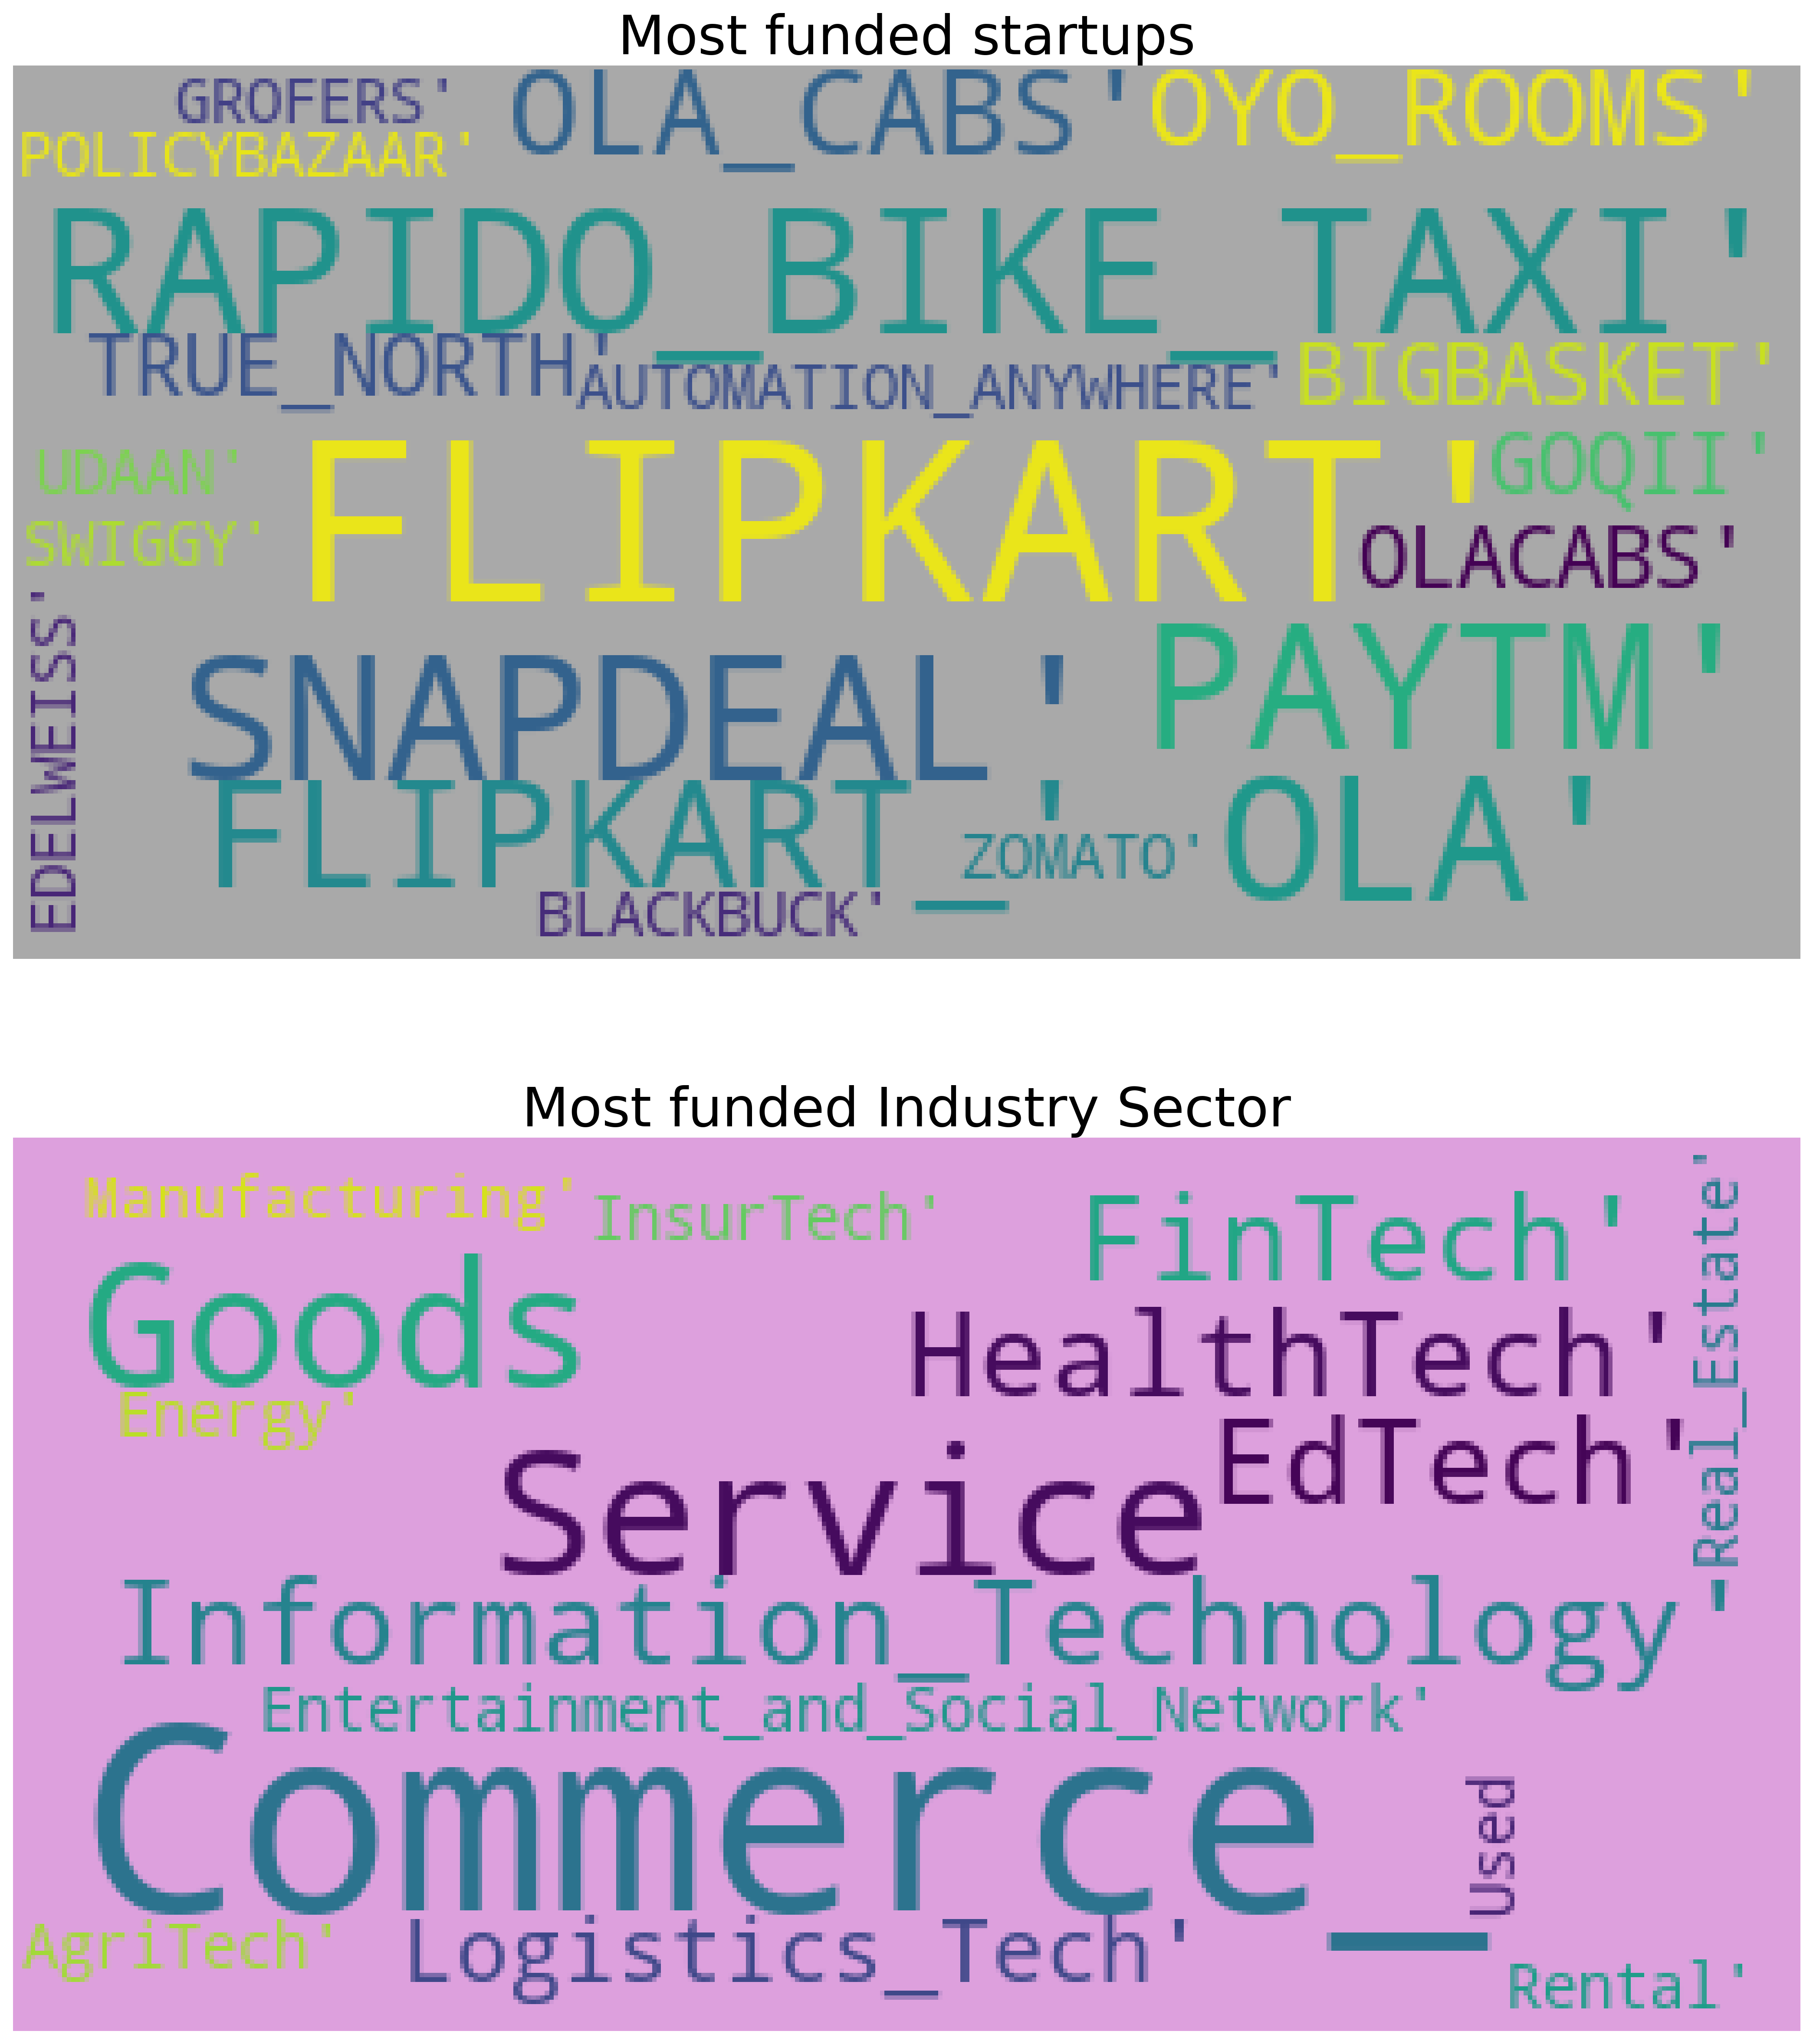

In [23]:
st=pd.Series(data.groupby('Startup Name').sum()['Amount in USD'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('Most funded startups', fontsize=30)
ax[0].imshow(wc)

c=np.array(data['Industry Vertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')

               
wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))
ax[1].axis('off')
ax[1].set_title('Most funded Industry Sector', fontsize=30)
ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'

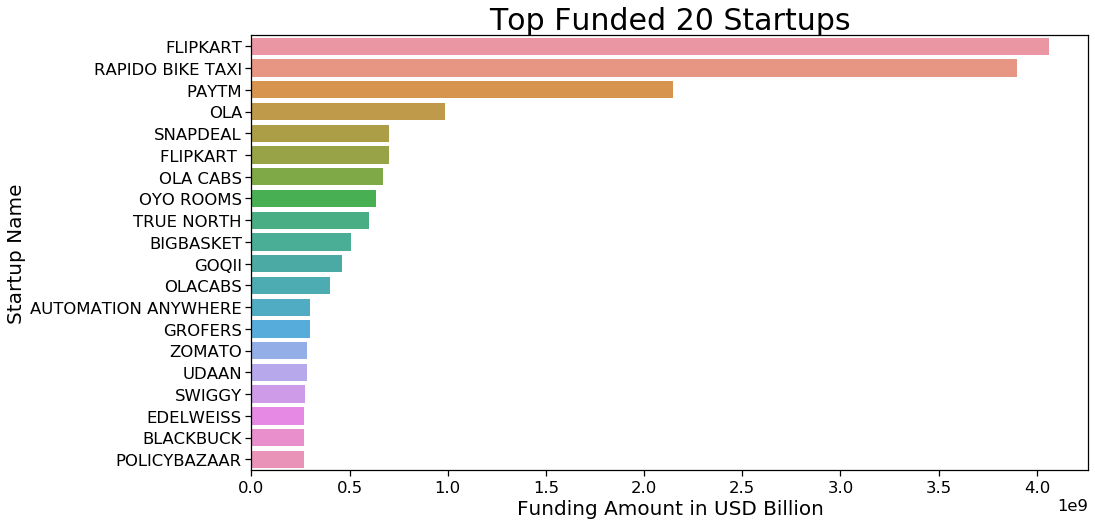

In [24]:
#
plt.figure(figsize=(15,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(y = data.groupby('Startup Name').sum().sort_values(by = 'Amount in USD' ,ascending = False)[:20]['Amount in USD'].index , 
            x = 'Amount in USD' , data = data.groupby('Startup Name').sum().sort_values(by = 'Amount in USD' ,ascending = False)[:20]) 
plt.title('Top Funded 20 Startups', fontsize=30)
plt.xlabel('Funding Amount in USD Billion', fontsize=20)
plt.ylabel('Startup Name', fontsize=20)
plt.show()

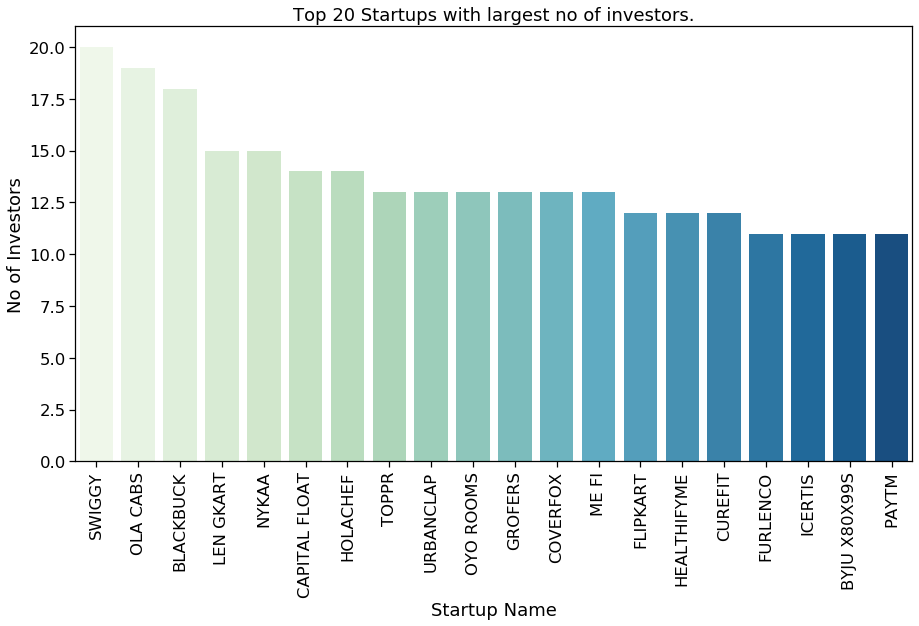

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = data.groupby('Startup Name').count().sort_values(by = 'No of Investors' ,ascending = False)[:20]['Amount in USD'].index , palette='GnBu' , y = 'No of Investors' , data = data.groupby('Startup Name').sum().sort_values(by = 'No of Investors' ,ascending = False)[:20]) 
plt.title('Top 20 Startups with largest no of investors.' )
plt.show()

# How did the funding ecosystem change with time? 

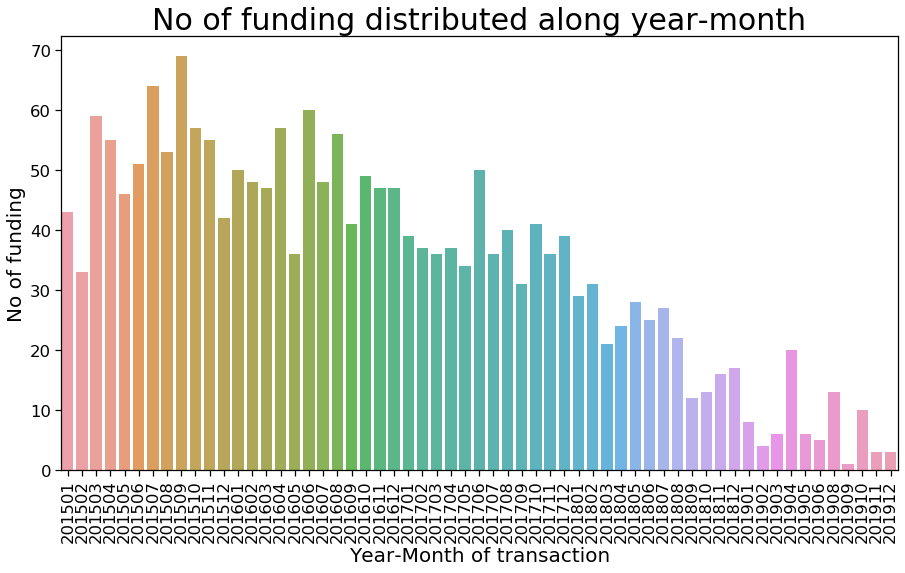

In [26]:
# no of funding was distributed along year-month
data["yearmonth"] = (pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)
year_month = data['yearmonth'].value_counts()

# Display graphically how no of funding was distributed along year-month.
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9)
plt.xticks(rotation='vertical')
plt.title('No of funding distributed along year-month', fontsize=30)
plt.xlabel('Year-Month of transaction', fontsize=20)
plt.ylabel('No of funding', fontsize=20)
plt.show()


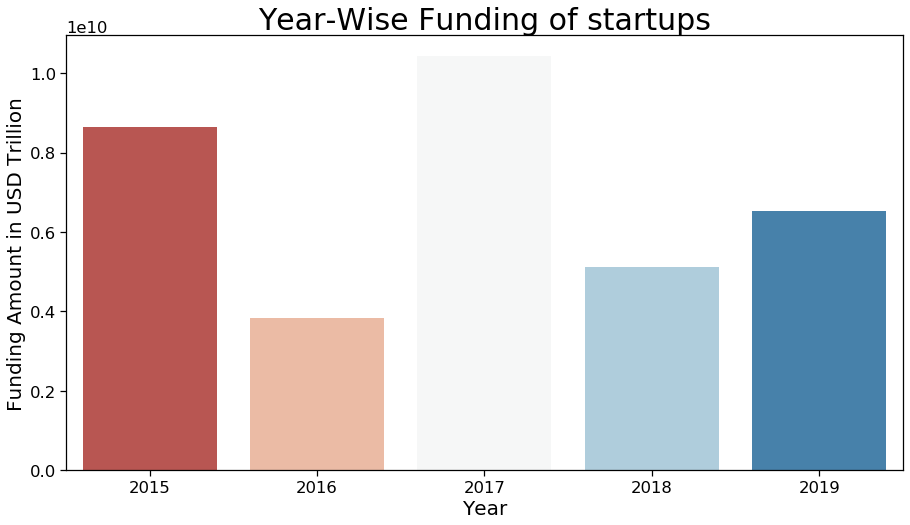

In [27]:
# Plot a bar plot to show the year wise funding recieved by startups.
plt.figure(figsize= (15,8))
plt.title('Year-Wise Funding of startups', fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Funding Amount in USD Trillion', fontsize=20)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = fund_df[::].index ,  y = [fund_df.loc[2015].values.sum() , fund_df.loc[2016].values.sum() , 
           fund_df.loc[2017].values.sum() , fund_df.loc[2018].values.sum() , fund_df.loc[2019].values.sum()] , palette="RdBu") 
plt.show()

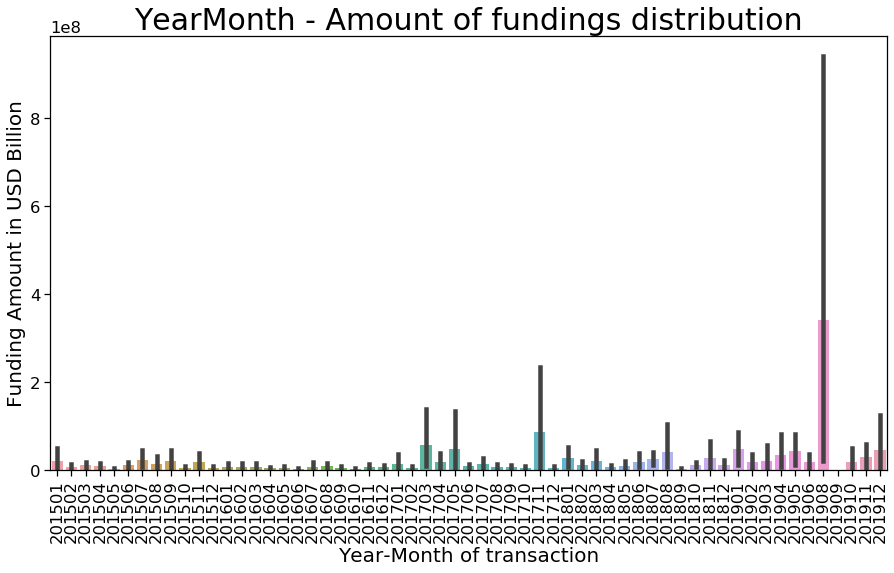

In [28]:
# Display graphically how amount of funding was distributed along year-month.
plt.figure(figsize=(15,8))
sns.barplot(data['yearmonth'], data['Amount in USD'], alpha=0.9)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=20)
plt.ylabel('Funding Amount in USD Billion', fontsize=20)
plt.title("YearMonth - Amount of fundings distribution", fontsize=30)
plt.show()


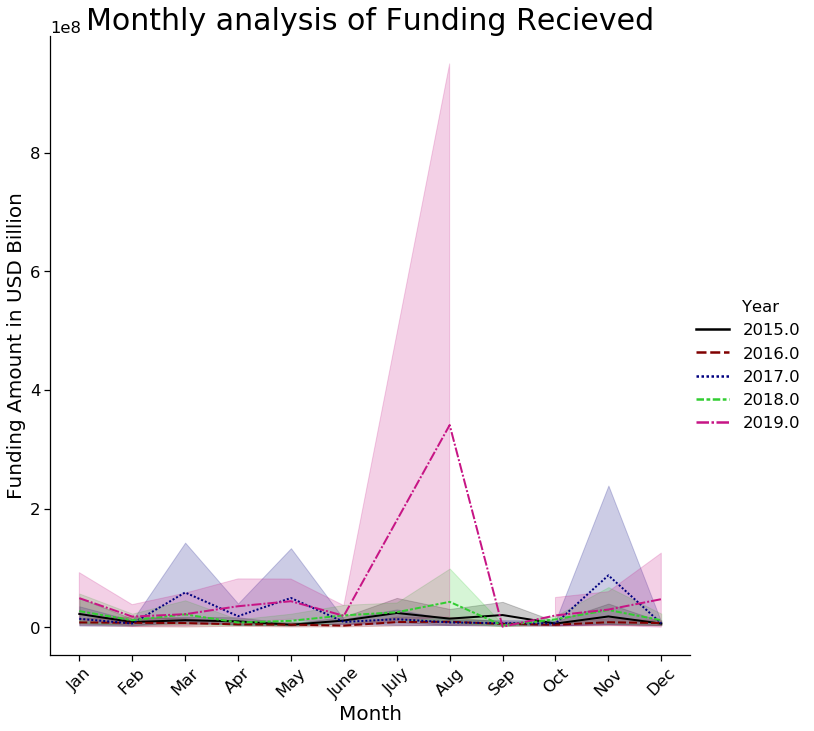

In [29]:

# Plot a line-plot to show the month-wise funding recieved.
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

ax = sns.relplot( height = 10,x = 'Month' , style = 'Year' ,kind = 'line', lw = 2, y = 'Amount in USD' , sort = col,  
                 palette = ['black' , 'maroon' , 'navy' , 'limegreen' , 'mediumvioletred'], hue= 'Year', data = fund_df_temp)

plt.xticks(np.arange(1,13) , col , rotation = 45)
plt.title('Monthly analysis of Funding Recieved', fontsize=30)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Funding Amount in USD Billion', fontsize=20)
plt.show()

# Which industries are favored by investors for funding? Or in other words which type of companies got more funding? 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


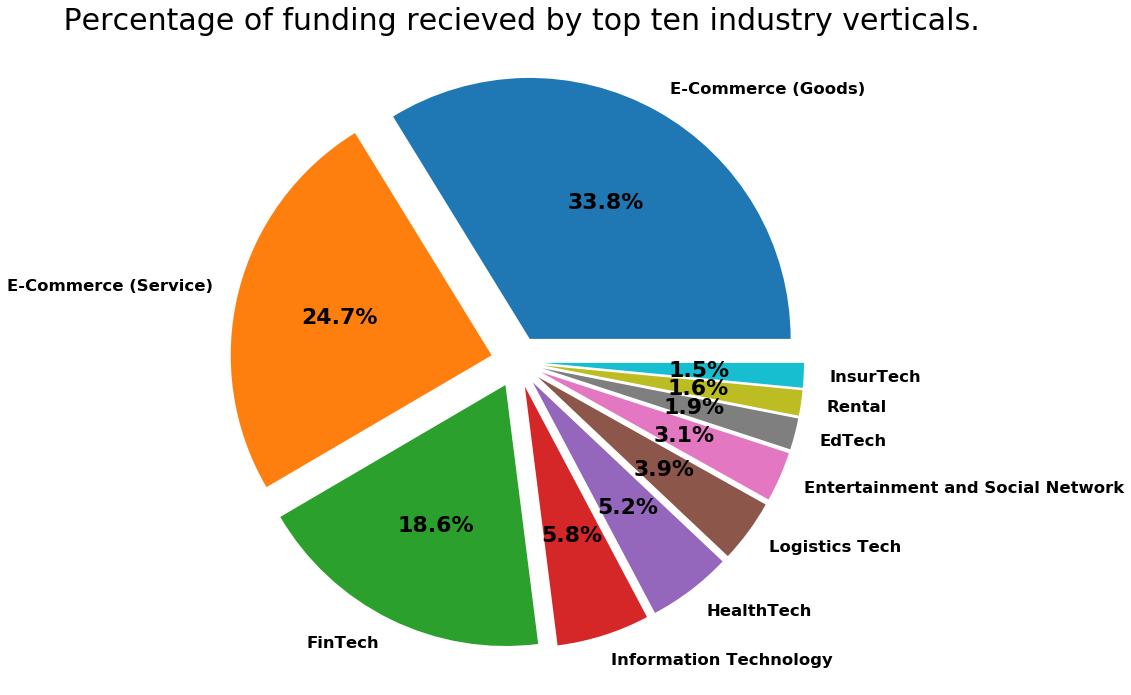

In [30]:
# Here we find the industry vertical which recieved the maximum funding.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
labels = data.groupby('Industry Vertical').sum().sort_values(by = 'Amount in USD' , ascending = False)[:10].index
values = data.groupby('Industry Vertical').sum().sort_values(by = 'Amount in USD' , ascending = False)[:10]['Amount in USD'].values
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = labels , x = values , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Percentage of funding recieved by top ten industry verticals.' , fontsize = 30)
plt.show()

# What are different types of funding for startups?

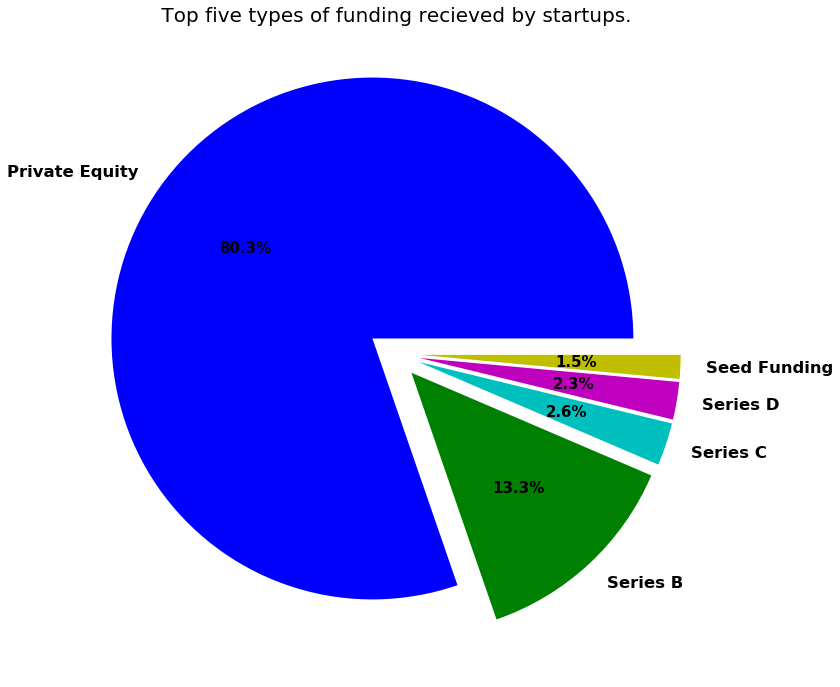

In [38]:
# Here we find the type of funding(top 5) recieved by startups.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
labels = data.groupby('Investment Type').sum().sort_values(by = 'Amount in USD' , ascending = False)[:5].index
values = data.groupby('Investment Type').sum().sort_values(by = 'Amount in USD' , ascending = False)[:5]['Amount in USD'].values
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(colors = ['b' , 'g' , 'c' , 'm' , 'y'] ,  labels = labels , x = values , autopct='%.1f%%' , explode = [0.1 for x in range(5)])
plt.title(' Top five types of funding recieved by startups.' , fontsize = 20)
plt.show()


# Do cities play a major role in funding? Or in other words which city has maximum startups? 

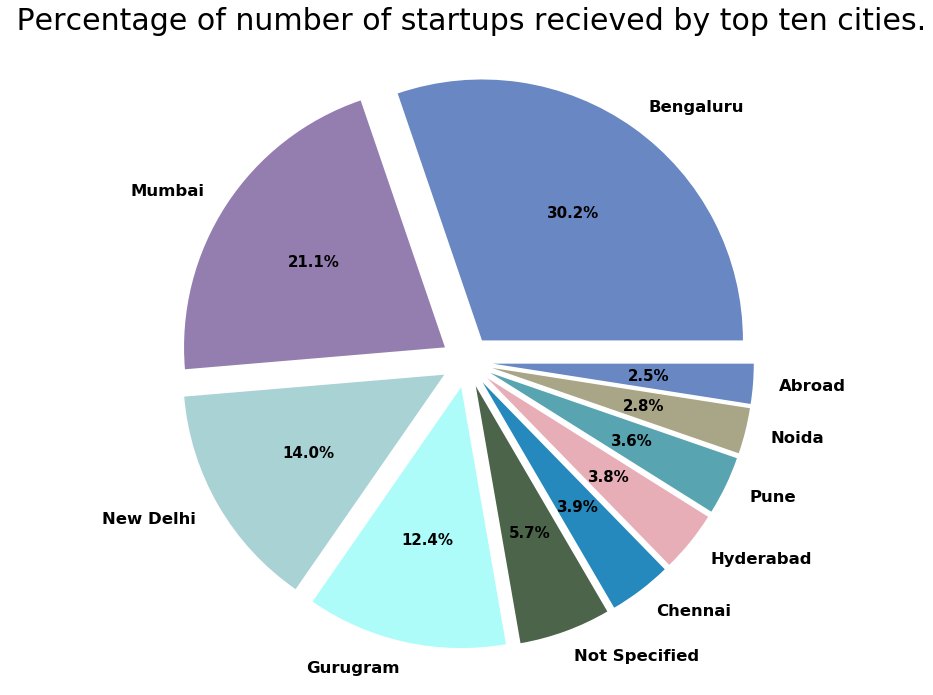

In [36]:
colors = ['#6987C2' ,'#947EB0' , '#A9D2D5' , '#ADFCF9' , '#4B644A' , '#2589BD' , '#E8AEB7' , '#58A4B0' , '#A9A587' ]
top_cities = data.groupby('City  Location' ).count().sort_values(by = 'Startup Name' , ascending = False)[:10]
# Here we find the industry vertical which recieved the maximum funding.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
labels = top_cities.index
values = top_cities['Startup Name'].values
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  colors = colors,labels = labels , x = values , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Percentage of number of startups recieved by top ten cities.' , fontsize = 30)
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


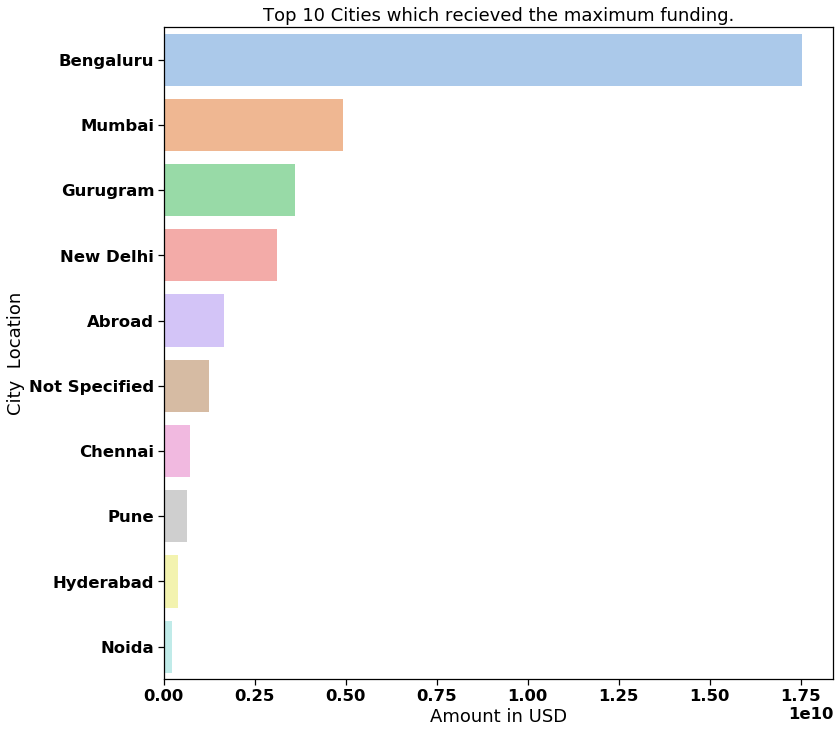

In [37]:
# Plot the data.
city_data = data.groupby('City  Location' ).sum().sort_values(by = 'Amount in USD' , ascending = False)[:10]
plt.figure(figsize=(12,12))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.barplot(y = city_data.index , x = 'Amount in USD' , data = city_data , palette= 'pastel') 
plt.title('Top 10 Cities which recieved the maximum funding.' )
plt.show()

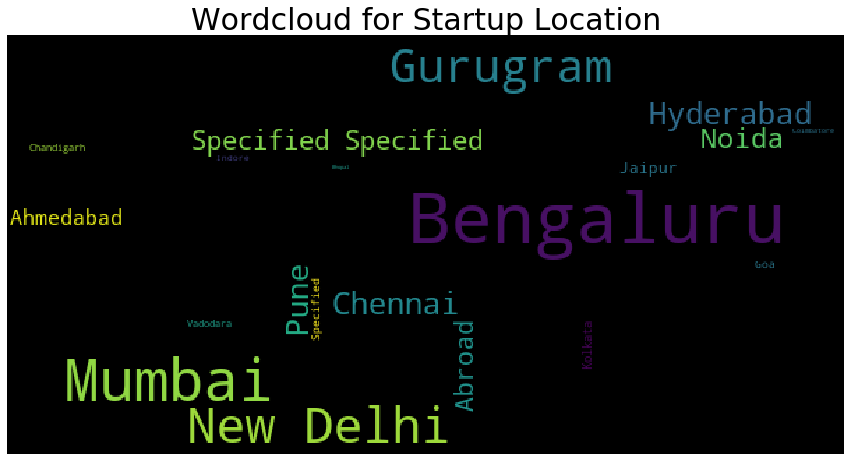

In [34]:
names = data["City  Location"][~pd.isnull(data["City  Location"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Startup Location", fontsize=30)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top Industry Vertical')

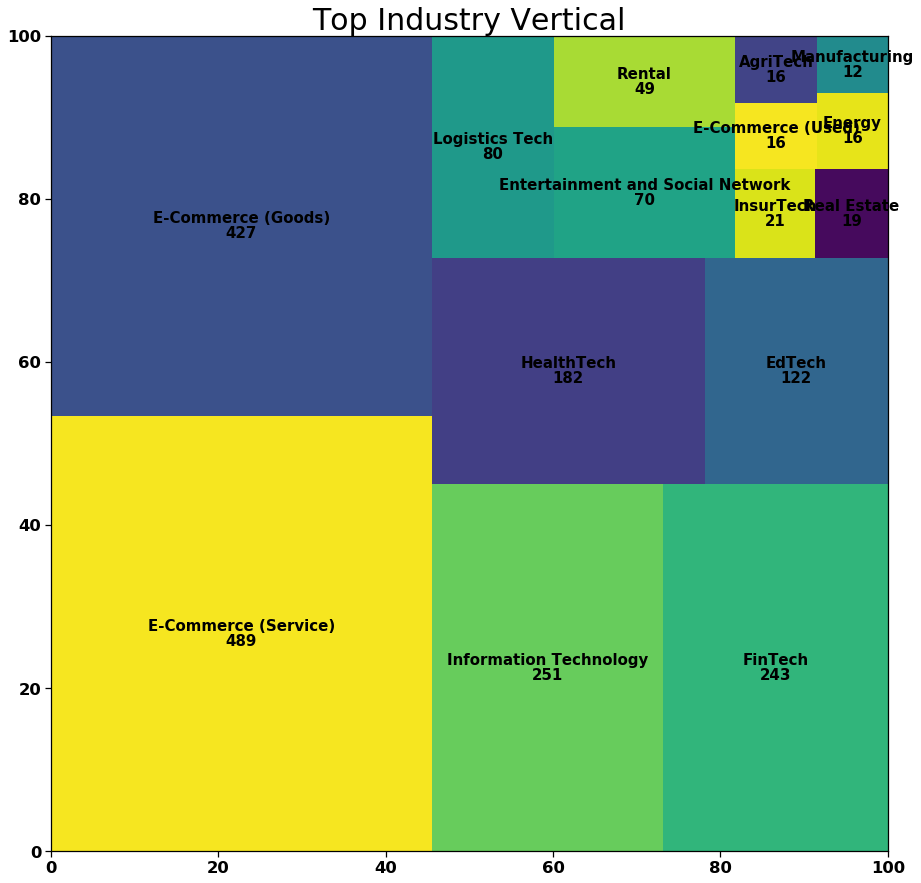

In [33]:
plt.figure(figsize=(15,15))
count = data['Industry Vertical'].value_counts()
squarify.plot(sizes = count.values,label = count.index, value = count.values)
plt.title('Top Industry Vertical', fontsize = 30)